# Weather and Taxi trips Analysis

# Intro:

This project examines taxi trips in Chicago to identify patterns in ride destinations and assess the impact of weather on trip durations. The primary objective is to determine the top ten neighborhoods for taxi drop-offs and test the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." Data from taxi companies, ride destinations, and weather conditions will be analyzed to provide actionable insights for taxi services and urban planning.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [44]:
taxi_df = pd.read_csv('/datasets/project_sql_result_01.csv')
trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_df = pd.read_csv('/datasets/project_sql_result_07.csv')

***The data frames:***

taxi_df
 - company_name: taxi company name
 - trips_amount: the number of rides for each taxi company on November 15-16, 2017

trips_df
 - dropoff_location_name: Chicago neighborhoods where rides ended
 - average_trips: the average number of rides that ended in each neighborhood in November 2017.
 
weather_df
 - start_ts	: pickup date and time
 - weather_conditions: weather conditions at the moment the ride started described as good or bad
 - duration_seconds: ride duration in seconds

In [45]:
def update(data_frame):
    data_frame.info()
    display(data_frame.head())   

In [46]:
update(taxi_df)
update(trips_df)
update(weather_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [47]:
# checking for full line duplicatation
display(trips_df.duplicated().sum())
display(taxi_df.duplicated().sum())
display(weather_df.duplicated().sum())

0

0

197

In [48]:
display(weather_df[weather_df.duplicated()])
display(weather_df[weather_df.duplicated()]['duration_seconds'].unique())

# Separate values that end in zero and values that do not
duplicated_df = weather_df[weather_df.duplicated()]
end_in_zero = duplicated_df[duplicated_df['duration_seconds'] % 10 == 0]
not_end_in_zero = duplicated_df[duplicated_df['duration_seconds'] % 10 != 0]

print("\nValues ending in zero (from duplicates):")
display(end_in_zero['duration_seconds'].unique())

print("\nValues not ending in zero (from duplicates):")
display(not_end_in_zero['duration_seconds'].unique())

# Values to filter
values_to_filter = [1323., 1267., 2151., 2963.]

# Filter DataFrame
filtered_weather = weather_df[weather_df['duration_seconds'].isin(values_to_filter)]
display(filtered_weather)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


array([1260., 1380., 3300., 1323., 1440., 2640., 1200., 2580., 3120.,
       1620., 3360., 2460., 1320., 2820., 2940., 3180., 2400., 1560.,
       1860., 2340., 2280., 2040., 1500., 2220., 3240., 2520., 1140.,
       3000., 2760., 2100., 1980., 2700., 3840., 1267., 2151., 3420.,
       2963., 3540., 1680., 1740., 3480., 1800., 3660.])


Values ending in zero (from duplicates):


array([1260., 1380., 3300., 1440., 2640., 1200., 2580., 3120., 1620.,
       3360., 2460., 1320., 2820., 2940., 3180., 2400., 1560., 1860.,
       2340., 2280., 2040., 1500., 2220., 3240., 2520., 1140., 3000.,
       2760., 2100., 1980., 2700., 3840., 3420., 3540., 1680., 1740.,
       3480., 1800., 3660.])


Values not ending in zero (from duplicates):


array([1323., 1267., 2151., 2963.])

,start_ts,weather_conditions,duration_seconds
189,2017-11-04 08:00:00,Good,1323.0
190,2017-11-04 08:00:00,Good,1323.0
681,2017-11-04 06:00:00,Good,1267.0
682,2017-11-04 06:00:00,Good,1267.0
683,2017-11-04 17:00:00,Bad,2151.0
684,2017-11-04 17:00:00,Bad,2151.0
707,2017-11-04 11:00:00,Good,2963.0
709,2017-11-04 11:00:00,Good,2963.0


In [49]:
# Define values that do not end in zero
values_not_ending_in_zero = [1323., 1267., 2151., 2963.]

# Filter rows with these values
rows_with_values_not_end_zero = weather_df[weather_df['duration_seconds'].isin(values_not_ending_in_zero)]

# Find duplicates in these filtered rows
duplicate_rows_with_values_not_end_zero = rows_with_values_not_end_zero[rows_with_values_not_end_zero.duplicated(keep='first')]

# Get indices of duplicates
indices_to_drop = duplicate_rows_with_values_not_end_zero.index

# Drop duplicates from the original DataFrame
weather_df_cleaned = weather_df.drop(index=indices_to_drop)

# Display the cleaned DataFrame
display(weather_df_cleaned)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


**Data Cleaning Conclusions**

There were no duplicated rows within taxi_df or trips_df. 

However, there were 197 rows that had duplications in weather_df. After looking at the duplicated data many ended in 0. THe assumption was made that some companies are recording duration to the nearest tens of seconds and those lines were kept in the data. Additionally getting rid of a tenth of the data seemed like to much of a cut. There were 8 lines that were duplicated and ended in numbers other than zero. the duplications of these were taken out.

## Top Ten Neighborhoods

- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results


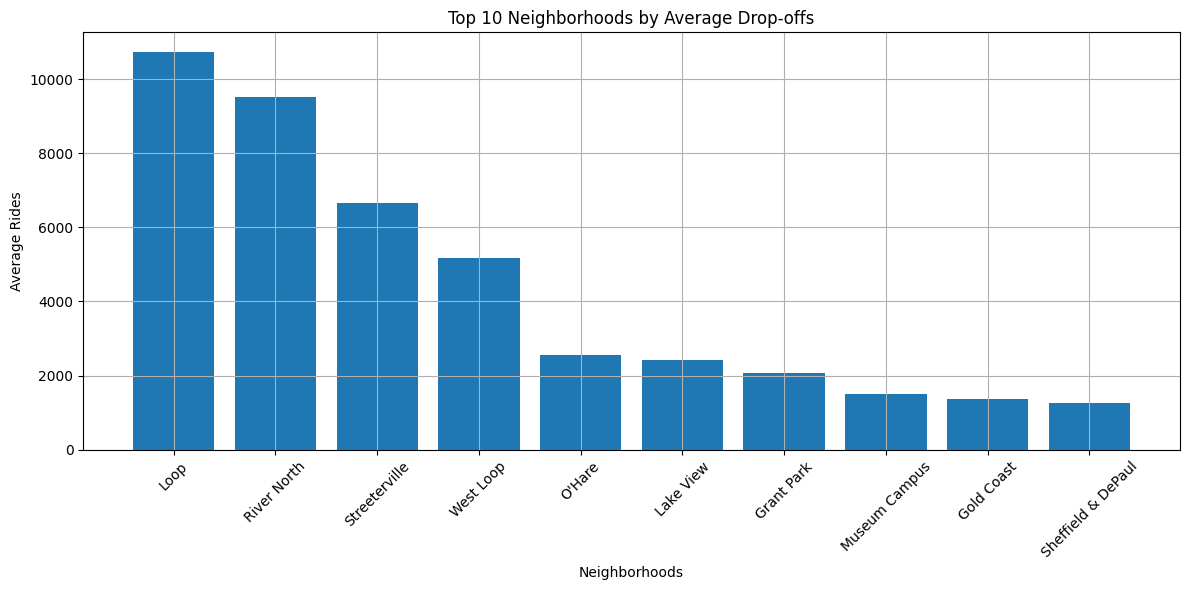

In [50]:
# Sort the DataFrame by average_trips in descending order and select the top 10
top_neighborhoods = trips_df.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_neighborhoods['dropoff_location_name'], top_neighborhoods['average_trips'])
plt.title('Top 10 Neighborhoods by Average Drop-offs')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Neighborhoods Conclusions**

Based on the graph, there are a clear top four neighborhoods within the top ten ; Loop, River North, Streeterville, and West Loop. Among these top four there are a top two neighborhoods that are the most popular for taxi drop offs; Loop and River North.

Most likely there is a large draw to these locations due to economic or attractivene locations.

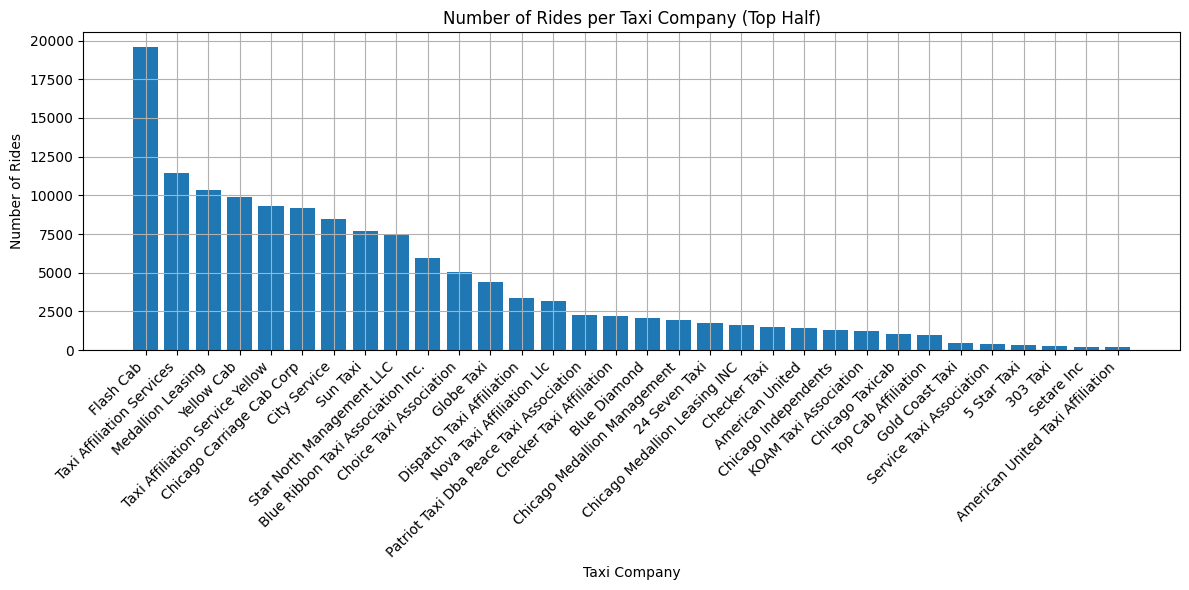

In [51]:
# Sort the DataFrame by trips_amount in descending order
sorted_taxi_df = taxi_df.sort_values(by='trips_amount', ascending=False)

# Get the top half of the sorted DataFrame
top_half_taxi_df = sorted_taxi_df.head(len(sorted_taxi_df) // 2)

# Plot the number of rides for the top half of the taxi companies
plt.figure(figsize=(12, 6))
plt.bar(top_half_taxi_df['company_name'], top_half_taxi_df['trips_amount'])
plt.title('Number of Rides per Taxi Company (Top Half)')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

**Taxi Companies Comclusions**

Flash Cab is the clear most popular or largest supplier of taxi rides. They are followed by another 10 companies that supply a good portion of the rides but quickly dwindle off after this.

## Testing the Hypothesis

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
- Decide where to set the significance level (alpha) on your own.
- how you formed the null and alternative hypotheses
- what criterion you used to test the hypotheses and why


H0: "There is no change in ride duration on Saturdays when it rains as compared to good weather."

H1: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [52]:
# Convert 'start_ts' to datetime format
weather_df['start_ts'] = pd.to_datetime(weather_df['start_ts'])

# Extract the day of the week
weather_df['day_of_week'] = weather_df['start_ts'].dt.day_name()

update(weather_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 33.5+ KB


,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [53]:
#making sure we only have data for saturday
weather_df['day_of_week'].unique()

array(['Saturday'], dtype=object)

In [54]:
#checking the number of good and bad weather and confirming there are only 2 options
weather_df['weather_conditions'].describe()

count     1068
unique       2
top       Good
freq       888
Name: weather_conditions, dtype: object

In [55]:
#Splitting the data into good an bad weather
rain_df = weather_df[weather_df['weather_conditions'] == 'Bad']
no_rain_df = weather_df[weather_df['weather_conditions'] == 'Good']

In [56]:
# Extract the numeric column for comparison
rain_durations = rain_df['duration_seconds']
no_rain_durations = no_rain_df['duration_seconds']

# Running an independent two-sample t-test to compare the rainy days trips to non-rainy days trips
results = st.ttest_ind(rain_durations, no_rain_durations, equal_var=False)

print('p-value:', results.pvalue)

alpha = 0.05  # Critical statistical significance level

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 6.738994326108734e-12
We reject the null hypothesis


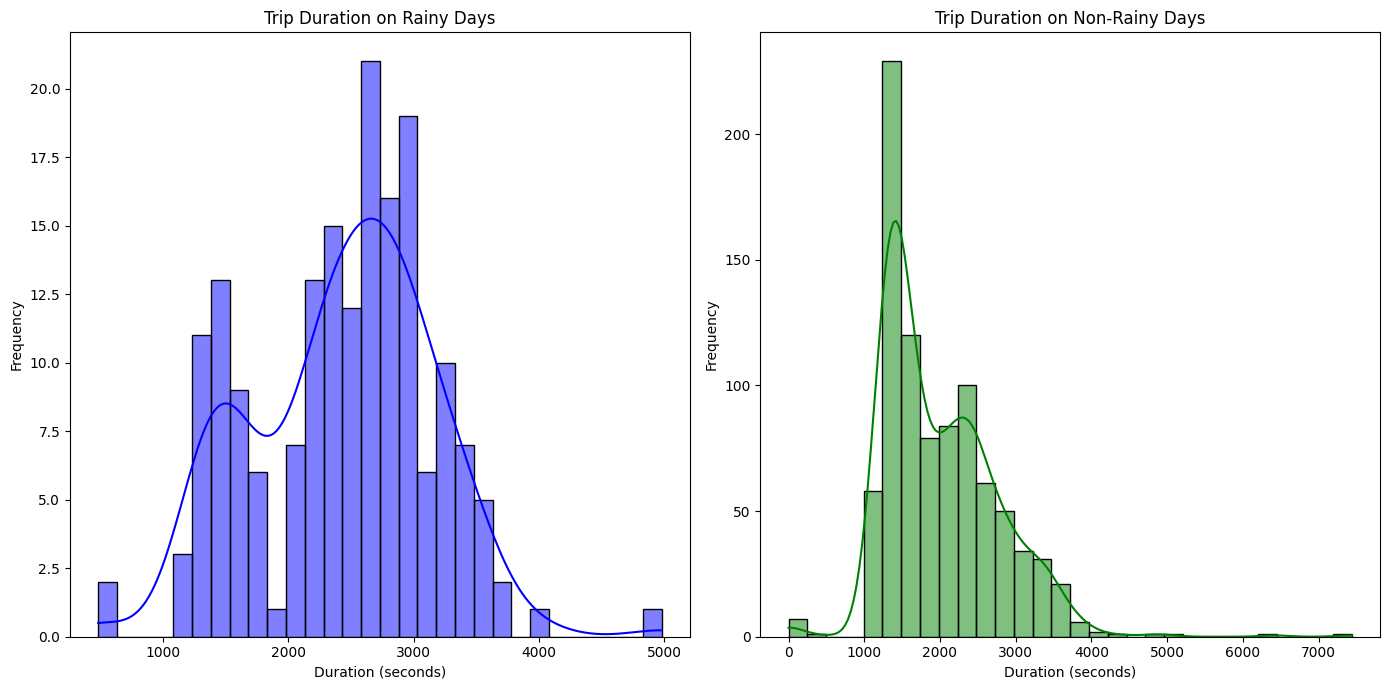

In [57]:
# Creating histograms for trip durations on rainy and non-rainy days
plt.figure(figsize=(14, 7))

# Rainy days histogram
plt.subplot(1, 2, 1)
sns.histplot(rain_df['duration_seconds'], kde=True, color='blue', bins=30)
plt.title('Trip Duration on Rainy Days')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Non-rainy days histogram
plt.subplot(1, 2, 2)
sns.histplot(no_rain_df['duration_seconds'], kde=True, color='green', bins=30)
plt.title('Trip Duration on Non-Rainy Days')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Take aways:

Given this p-value is far below the significance threshold of 0.05, we can conclude that there is a statistically significant difference in trip durations between the two weather conditions.

Weather conditions (rainy vs. non-rainy) have a significant impact on the duration of taxi trips in Chicago. 

# Conclusion

***Weather Impact on Trip Durations:*** There is a significant impact of weather on trip durations. Rainy or stormy conditions tend to increase the trip duration, likely due to the adverse effects of weather on traffic and driving conditions.

***Popular Drop-off Locations:*** The analysis of drop-offs reveals that certain neighborhoods in Chicago, especially central business districts and the airport, see a high volume of taxi traffic. This information can be valuable for taxi companies for better resource allocation and service planning.

The analysis identified the top ten neighborhoods in Chicago with the highest number of taxi drop-offs, offering valuable insights into areas of high demand. Additionally, the hypothesis regarding the influence of weather on the duration of rides from the Loop to O'Hare International Airport was tested, shedding light on how travel patterns are affected by rainy conditions. These findings can support decision-making for improving service operations and planning.